### What is Image Segmentation ?

Image segmentation using KMeans clustering based on pixel color values aims to partition the image into regions with similar colors.<br> This process simplifies the image and can be useful for various purposes.

**Practical Applications**
- Object Recognition: Identifying and isolating objects or regions within an image, such as distinguishing different parts of a scene or identifying specific objects.
- Preprocessing for Further Analysis: Serving as a preprocessing step for more complex analysis, such as object detection or classification.
- Image Compression: Reducing the number of colors can help in compressing the image data while maintaining the essential features.
- Medical Imaging: Highlighting specific regions of interest, such as tumors or organs, based on color differences in medical scans.

An image is a visual representation of information, captured or created in a way that can be displayed and perceived visually. <br>It is composed of tiny elements called pixels, which are the smallest units of an image. Each pixel contains color and intensity information, which together create the overall visual content.

#### Key Characteristics of an Image

Pixels:

- **The basic unit of an image.**
- Each pixel has a specific color and intensity.
- In digital images, pixels are arranged in a grid format.

Resolution:

- Refers to the number of pixels in an image, typically described as width x height (e.g., 1920x1080).
- Higher resolution means more pixels, leading to greater detail and clarity.

Color Depth:

- The number of bits used to represent the color of each pixel.
- Common color depths include 8-bit (256 colors), 16-bit, 24-bit (True Color, which can display about 16.7 million colors), and higher.

Color Models:

- RGB: Red, Green, Blue channels combine to create a wide array of colors. Common for digital screens.
- CMYK: Cyan, Magenta, Yellow, Key (Black). Used in color printing.
- Grayscale: Single-channel image representing shades of gray.
- HSV: Hue, Saturation, Value. Useful for certain image processing tasks.

#### How are pixels represented numerically ?

Pixels can be numerically represented in various ways depending on the type of image and the color model used. 


|Image Type|	Pixel Representation|	Example|
|--------|----|----|
|Grayscale|	Single value (0-255)|	128 (Medium gray)
|RGB|	Three values (0-255)|	[255, 0, 0] (Red)
|HSV|	Three values (H:0-360, S:0-100, V:0-100)|	[0, 100, 100] (Bright red)
|CMYK|	Four values (0-100%)|	[0, 100, 100, 0] (Pure red)
|Lab|	Three values (L*:0-100, a*: -128 to 127, b*: -128 to 127)|	[50, 70, 20] (Specific color)
|Binary|	Single value (0 or 1)|	1 (White)

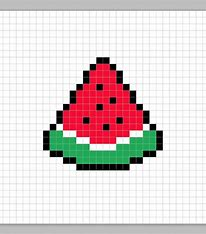

Each grid in the above image represents a single pixel.

In [52]:
import numpy as np
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

**About the PIL Library**<br>
The PIL (Python Imaging Library) library is a powerful tool for opening, manipulating, and saving many different image file formats in Python.

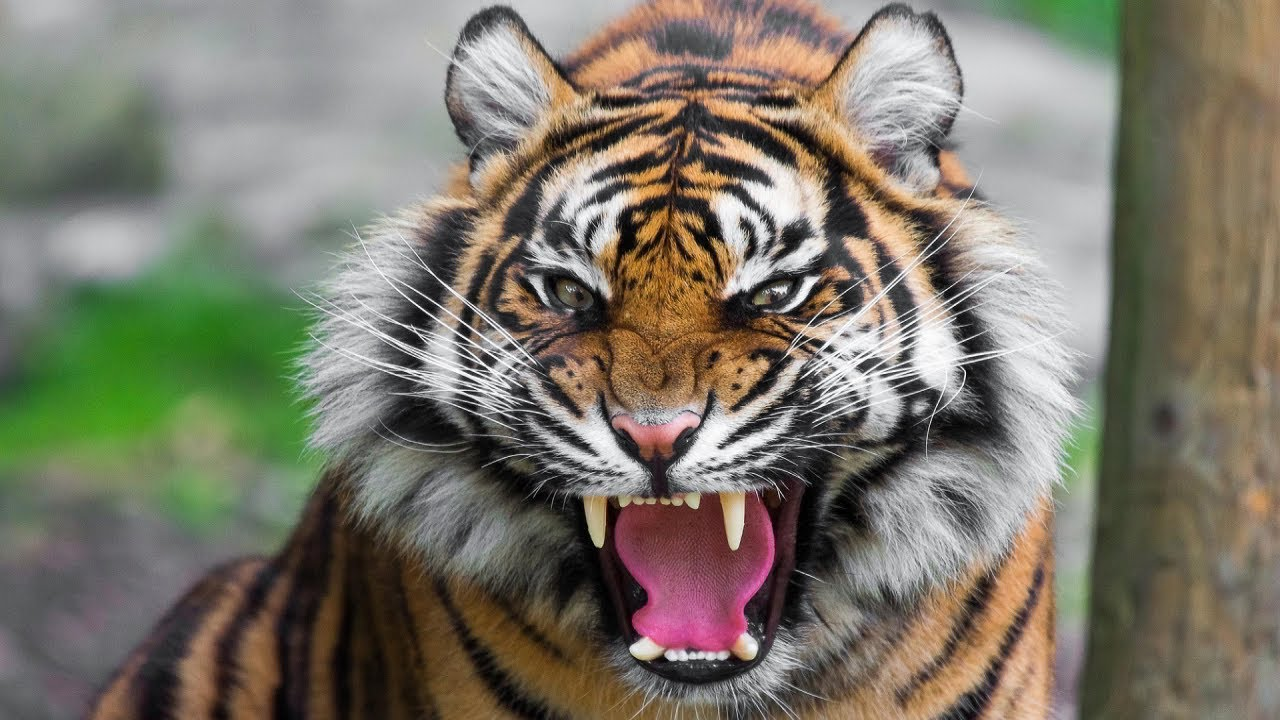

In [53]:
# Load the image using PIL
image = Image.open('tiger.png')
image = image.convert('RGB')  # Ensure the image is in RGB format
image

In [54]:
# Convert the image to a numpy array
image_np = np.array(image)
image_np

array([[[164, 160, 159],
        [165, 161, 160],
        [164, 163, 161],
        ...,
        [160, 128,  90],
        [158, 125,  90],
        [161, 128,  93]],

       [[164, 160, 159],
        [164, 160, 159],
        [163, 162, 160],
        ...,
        [164, 132,  94],
        [162, 129,  94],
        [157, 124,  89]],

       [[163, 159, 156],
        [164, 160, 157],
        [163, 162, 160],
        ...,
        [164, 132,  94],
        [162, 129,  94],
        [157, 124,  89]],

       ...,

       [[ 93,  94,  96],
        [ 93,  94,  96],
        [ 92,  93,  95],
        ...,
        [120, 116, 107],
        [121, 117, 108],
        [122, 118, 109]],

       [[ 93,  94,  96],
        [ 93,  94,  96],
        [ 92,  93,  95],
        ...,
        [120, 116, 107],
        [121, 117, 108],
        [122, 118, 109]],

       [[ 93,  94,  96],
        [ 93,  94,  96],
        [ 92,  93,  95],
        ...,
        [119, 115, 106],
        [121, 117, 108],
        [122, 118, 109]]

**What does the above code do?**<br>
Change in Data Representation: The image data, which is originally stored in a format specific to PIL (Pillow), is converted into a NumPy array format. Each pixel's color values (RGB or grayscale) are typically stored as numerical values in the array.

In [55]:
image_np.shape

(720, 1280, 3)

**Shape of the image (height, width, 3)**
- Height: The number of rows of pixels in the image. It measures how tall the image is.
- Width: The number of columns of pixels in the image. It measures how wide the image is.
- 3: Represents the three color channels (Red, Green, Blue).

In [56]:
# Reshape the image to a 2D array of pixels
pixel_values = image_np.reshape((-1, 3))
print(pixel_values)

[[164 160 159]
 [165 161 160]
 [164 163 161]
 ...
 [119 115 106]
 [121 117 108]
 [122 118 109]]


In [84]:
# Define the number of clusters (K)
k = 20
# Apply KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pixel_values)

C:\Users\parth\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [85]:
len(labels)

921600

In [86]:
centers = np.uint8(kmeans.cluster_centers_)

# Map the labels to the center points (colors)
segmented_image = centers[labels.flatten()]

In [87]:
# Reshape back to the original image dimensions
segmented_image = segmented_image.reshape(image_np.shape)

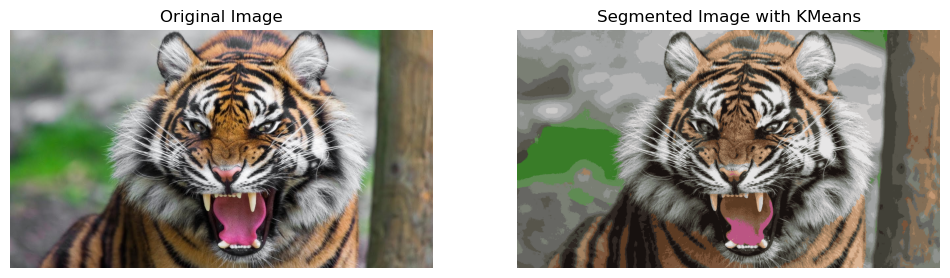

In [88]:
# Display the original and segmented images using matplotlib
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')

# Segmented image
ax2.imshow(segmented_image)
ax2.set_title('Segmented Image with KMeans')
ax2.axis('off')

plt.show()
